In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [2]:
bank=pd.read_csv('D:\\project\\bankruptcy-prev.csv')
bank.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


# Exploratory Data Analysis

In [3]:
bank.shape

(250, 7)

In [4]:
bank['industrial_risk'].value_counts()
bank['industrial_risk'].unique()

array([0.5, 0. , 1. ])

In [5]:
bank['management_risk'].value_counts()
bank['management_risk'].unique()

array([1. , 0. , 0.5])

In [6]:
bank['financial_flexibility'].value_counts()
bank['financial_flexibility'].unique()

array([0. , 0.5, 1. ])

In [7]:
bank['credibility'].value_counts()
bank['credibility'].unique()

array([0. , 0.5, 1. ])

In [8]:
bank['competitiveness'].value_counts()
bank['competitiveness'].unique()

array([0. , 0.5, 1. ])

In [9]:
bank['operating_risk'].value_counts()
bank['operating_risk'].unique()

array([0.5, 1. , 0. ])

In [10]:
bank['class'].value_counts()
bank['class'].unique()

array(['bankruptcy', 'non-bankruptcy'], dtype=object)

In [11]:
bank.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [13]:
bank.dtypes

industrial_risk          float64
management_risk          float64
financial_flexibility    float64
credibility              float64
competitiveness          float64
operating_risk           float64
class                     object
dtype: object

In [14]:
bank.nunique()

industrial_risk          3
management_risk          3
financial_flexibility    3
credibility              3
competitiveness          3
operating_risk           3
class                    2
dtype: int64

# Missing values

In [15]:
bank.isnull().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

In [16]:
bank.drop_duplicates()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
185,0.0,0.5,0.0,0.5,1.0,0.5,non-bankruptcy
187,0.0,0.5,0.5,0.5,1.0,0.5,non-bankruptcy
190,0.0,0.5,0.5,0.0,1.0,0.0,non-bankruptcy
192,0.5,1.0,0.0,0.0,1.0,0.0,non-bankruptcy


In [17]:
# Class proportion
class_counts = bank.groupby('class').size()
print(class_counts)

class
bankruptcy        107
non-bankruptcy    143
dtype: int64


# Visualization

In [18]:
correlations = bank.corr()
correlations

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000


# Univariate histogram and Correlation analysis

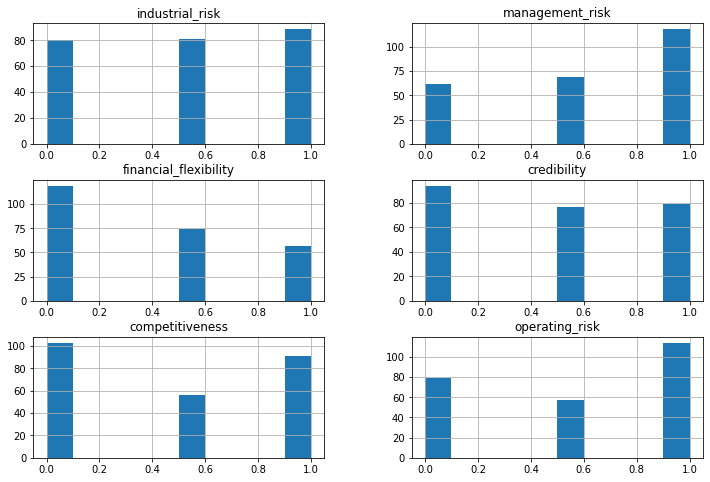

In [19]:
# Univariate Histograms
bank.hist(figsize=(12, 8))
pyplot.show()

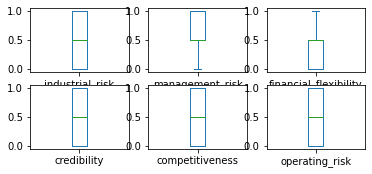

In [20]:
# Box and Whisker Plots
bank.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

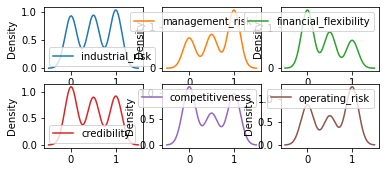

In [21]:
# Univariate Density Plots
bank.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

<AxesSubplot:>

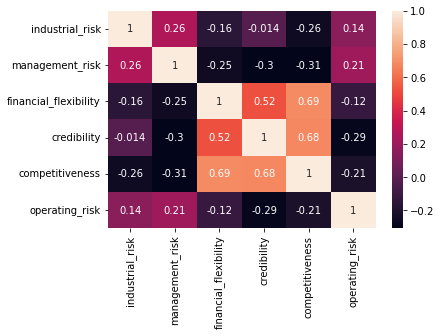

In [22]:
sns.heatmap(correlations,xticklabels=correlations.columns, yticklabels=correlations.columns,annot=True)

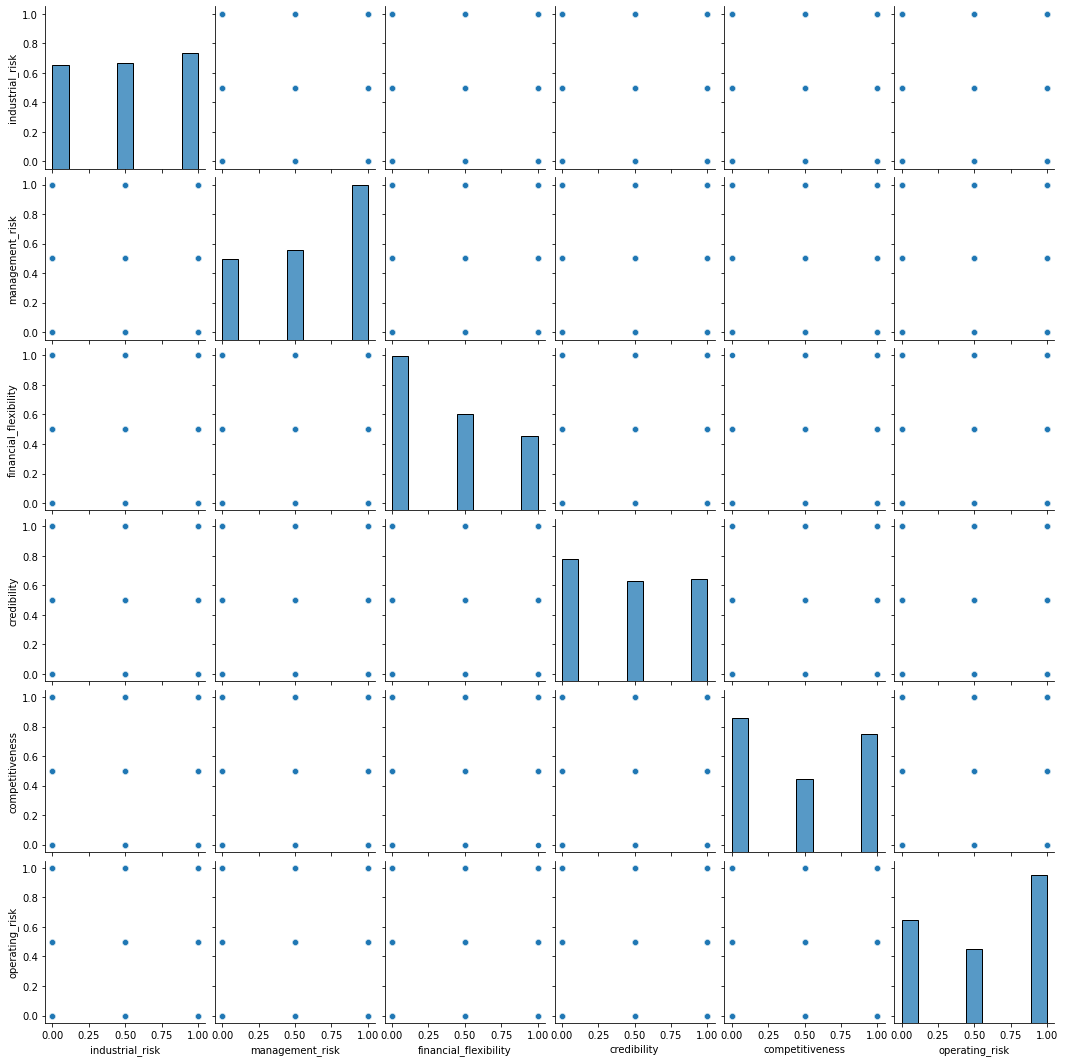

In [23]:
# Scatterplot Matrix
sns.pairplot(bank)

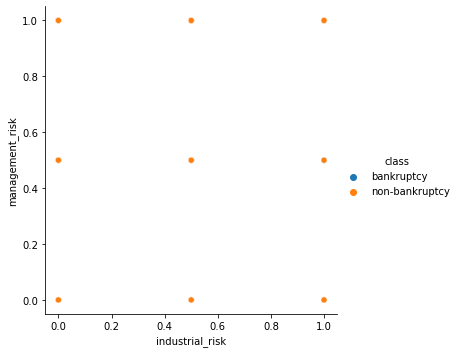

In [24]:
sns.relplot(x='industrial_risk', y='management_risk', hue='class', data=bank)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='industrial_risk', ylabel='Density'>

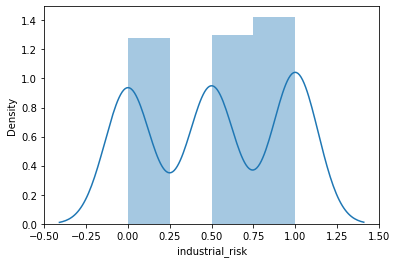

In [25]:
sns.distplot(bank['industrial_risk'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='management_risk', ylabel='Density'>

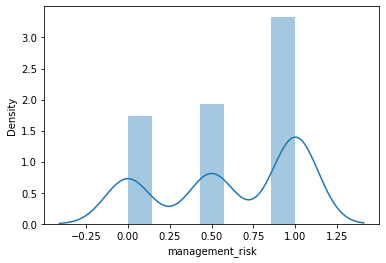

In [26]:
sns.distplot(bank['management_risk'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='financial_flexibility', ylabel='Density'>

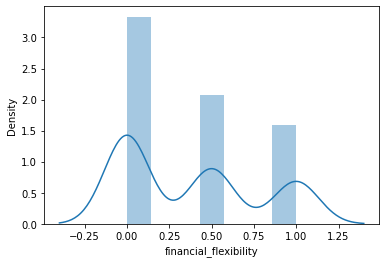

In [27]:
sns.distplot(bank['financial_flexibility'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='credibility', ylabel='Density'>

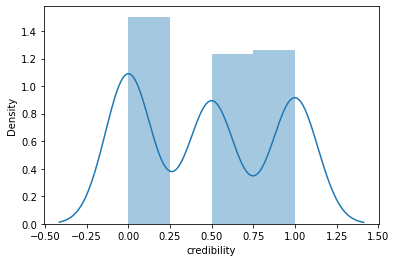

In [28]:
sns.distplot(bank['credibility'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='competitiveness', ylabel='Density'>

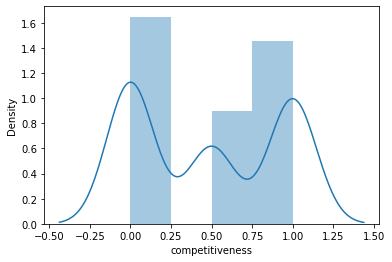

In [29]:
sns.distplot(bank['competitiveness'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='operating_risk', ylabel='Density'>

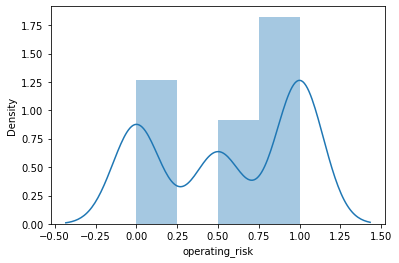

In [30]:
sns.distplot(bank['operating_risk'])

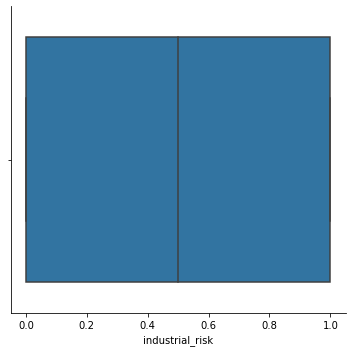

In [31]:
sns.catplot(x='industrial_risk',kind='box',data=bank)

# Encoding the categorical columns by using label encoder

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
bank.iloc[:,6]=le.fit_transform(bank.iloc[:,6])
bank

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [34]:
# Split df into X and y
y = bank['class']
X = bank.drop('class', axis=1)

In [35]:
X

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
0,0.5,1.0,0.0,0.0,0.0,0.5
1,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,0.5,0.0,0.0,0.5,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0
246,1.0,1.0,0.5,1.0,1.0,0.0
247,0.0,1.0,1.0,0.5,0.5,0.0
248,1.0,0.0,0.5,1.0,0.5,0.0


In [36]:
y

0      0
1      0
2      0
3      0
4      0
      ..
245    1
246    1
247    1
248    1
249    1
Name: class, Length: 250, dtype: int32

In [37]:
bank['class'].value_counts()

1    143
0    107
Name: class, dtype: int64

# Data Rescaling

In [38]:
# Rescale data (between x and y)

from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
array = bank.values
# separate array into input and output components
X = array[:,1:6]
Y = array[:,6]

scaler = MinMaxScaler()
rescaledX = scaler.fit_transform(X)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[1.  0.  0.  0.  0.5]
 [1.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  1. ]
 [0.  0.  0.5 0.  1. ]
 [1.  0.  0.  0.  1. ]]


# Data Standardization

In [39]:
from sklearn.preprocessing import StandardScaler
array = bank.values
# separate array into input and output components
X = array[:,0:6]
Y = array[:,6]

scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[-0.044  0.942 -0.938 -1.133 -1.082 -0.161]
 [-1.261  0.942 -0.938 -1.133 -1.082  0.991]
 [ 1.174 -1.498 -0.938 -1.133 -1.082  0.991]
 [-0.044 -1.498 -0.938  0.072 -1.082  0.991]
 [ 1.174  0.942 -0.938 -1.133 -1.082  0.991]]


# Model Validation Methods


In [40]:
# Evaluate using a train test split method
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
array = bank.values
X = array[:,0:6]
Y = array[:,6]

test_size = 0.33
seed = 5
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)


result = model.score(X_test, Y_test)

result*200

200.0

In [41]:
X_train

array([[0. , 0. , 1. , 0.5, 1. , 1. ],
       [0.5, 1. , 0. , 0. , 0. , 0.5],
       [1. , 0.5, 0. , 0. , 0. , 0. ],
       ...,
       [0.5, 0.5, 1. , 0.5, 1. , 0.5],
       [0. , 0.5, 1. , 0.5, 1. , 0. ],
       [1. , 1. , 0. , 0. , 0. , 0.5]])

In [42]:
# Evaluate using Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
array = bank.values
X = array[:,0:6]
Y = array[:,6]

num_folds = 10
seed = 7

kfold = KFold(n_splits=num_folds)
model = LogisticRegression(max_iter=500)

results = cross_val_score(model, X, Y, cv=kfold)

#Print results

results.mean()*100.0
results.std()*100.0
results.mean()*100.0

99.60000000000001

# Accuracy method

In [43]:
# Cross Validation Classification Accuracy
array = bank.values
X = array[:,0:6]
Y = array[:,6]

kfold = KFold(n_splits=10)
model = LogisticRegression(max_iter=500)

scoring = 'accuracy'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)


results.mean()

0.9960000000000001

In [44]:
results.std()

0.012000000000000009

In [45]:
results.mean()*100

99.60000000000001

# Model building

In [46]:
# CART Classification
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
array = bank.values
X = array[:,0:6]
Y = array[:,6]

kfold = KFold(n_splits=10)

model = DecisionTreeClassifier(criterion='gini')

results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

model = DecisionTreeClassifier()
dt=model.fit(X,Y)

0.9960000000000001


In [47]:
#Gaussian Naive Bayes Classification

from sklearn.naive_bayes import GaussianNB

kfold = KFold(n_splits=10)
model = GaussianNB()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.976


In [48]:
# KNN Classification
from sklearn.neighbors import KNeighborsClassifier

kfold = KFold(n_splits=10)
model = KNeighborsClassifier(n_neighbors=17)

results = cross_val_score(model, X, Y, cv=kfold)

print(results.mean())

0.9800000000000001


In [49]:
# smv Classification
from sklearn.svm import SVC

kfold =KFold(n_splits=10)

model=SVC()
results=cross_val_score(model,X,Y,cv=kfold)
print(results.mean())

0.9960000000000001


In [50]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

X = array[:,0:6]
Y = array[:,6]
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.992


# Compare the algorithms

In [51]:
# Compare Algorithms
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset

array = bank.values
X = array[:,0:6]
Y = array[:,6]


# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=400)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

SVM: 0.996000 (0.012000)


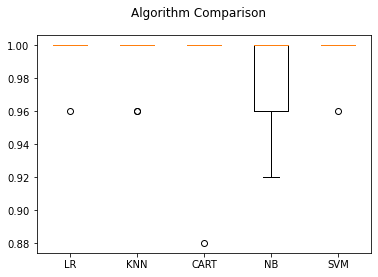

In [52]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [53]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# load data

array = bank.values
X = array[:,0:6]
Y = array[:,6]


# create pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('log', LogisticRegression()))
model = Pipeline(estimators)

# evaluate pipeline
kfold = KFold(n_splits=10)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9960000000000001


In [54]:
# Create a pipeline that extracts features from the data then creates a model
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
# load data

array = bank.values
X = array[:,0:6]
Y = array[:,6]

# create feature union
features = []
features.append(('pca', PCA(n_components=3)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)

# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', LogisticRegression(max_iter=300)))
model = Pipeline(estimators)
# evaluate pipeline
kfold = KFold(n_splits=10)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9960000000000001


In [55]:
# Save Model Using Pickle and load and predict
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from pickle import dump
from pickle import load

array = bank.values
X = array[:,0:6]
Y = array[:,6]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
# Fit the model on 33%
model = LogisticRegression(max_iter=200)
model.fit(X_train, Y_train)

# save the model to disk
data = 'finalized_model.sav'
dump(model, open('data', 'wb'))

# some time later...

# load the model from disk
loaded_model = load(open('data', 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

1.0


In [56]:
y_pred = model.predict(X_train)
y_pred

array([0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1.])

In [57]:
y_pred_test=model.predict(X_test)
y_pred_test

array([1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0.])

In [58]:
pd.crosstab(y_pred,Y_train)


col_0,0.0,1.0
row_0,,
0.0,64,0
1.0,1,102


In [59]:
pd.crosstab(y_pred_test,Y_test)

col_0,0.0,1.0
row_0,,
0.0,42,0
1.0,0,41


In [60]:
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [61]:
y_pred = classifier.predict(X)

In [62]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [63]:
y_pred_df

,actual,predicted_prob
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
245,1.0,1.0
246,1.0,1.0
247,1.0,1.0
248,1.0,1.0


In [64]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[106   1]
 [  0 143]]


In [65]:
((106+143)/(106+1+0+143))*100

99.6

In [66]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       107
         1.0       0.99      1.00      1.00       143

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



Text(0, 0.5, 'True Positive Rate')

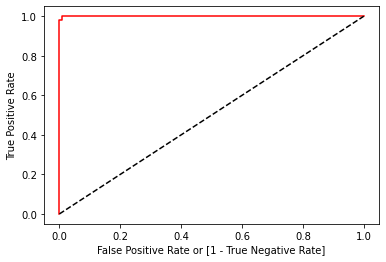

In [67]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [68]:
auc

0.9953271028037383